# Partial Least Squares Regression

## Introduction

Partial Least Squares Regression (PLSR) is a statistical method which is used to find the linear relation between a dependent variable $Y$ (response) and a set of $m$ independent variables $X$ (predictors), so that
$$
Y = b_{0} + b_{1} X_{1} + b_{2} X_{2} + \dots + b_{m} X_{m},
$$
where $b_{0}$ is the regression coefficient for the intercept, which represents a residual error, and $b_{i}$, $i = 1, 2, \dots, m$,
are the computed regression coefficients.

Using matrix notation and taking into account all response and predictor variables, the above expression can be written as
$$
\mathbf{Y} = \mathbf{XB} + \mathbf{B_{0}},
$$
where $\mathbf{Y}$ is the $n \times p$ matrix for the response variables, $\mathbf{X}$ is the $n \times m$ matrix for the predictor variables, $\mathbf{B}$ is the $m \times p$ regression coefficient matrix and $\mathbf{B_{0}}$ is the error term of the model and has the same dimensions as $\mathbf{Y}$.

The general underlying PLSR model decomposes $\mathbf{X}$ and $\mathbf{Y}$ matrices to a product of a common set of orthogonal factors and a set of specific loadings, much like PCA does. The response variables are decomposed as
$$
\mathbf{X} = \mathbf{TP^{\mathrm{T}}} + \mathbf{E},
$$
while the predictor variables are decomposed as
$$
\mathbf{Y} = \mathbf{UQ^{\mathrm{T}}} + \mathbf{F},
$$
where $\mathbf{T}$ and $\mathbf{U}$ are the $n \times l$ score matrices, $\mathbf{P}$ and $\mathbf{Q}$ are the $m \times l$ and $p \times l$ loading matrices, respectively, and $\mathbf{E}$ and $\mathbf{F}$ are the $n \times m$ and $n \times p$ error terms for $\mathbf{X}$ and $\mathbf{Y}$, respectively.

The PLS scores represent the new axes of the model (latent vectors) and are similar to the PCA scores. Specifically, the $T$ scores represent the new coordinates of the data points in the $X$ space, while the $U$ scores represent the new coordinates of the data points in the $Y$ space and are related to $T$ by a constant $C$, so that $\mathbf{U} = \mathbf{TC}$ in matrix notation. The relationship between $T$ and $U$ scores is a summary of the relationship between $X$ and $Y$ along a specific model component.

The PlS loadings express how much each of the $X$ and $Y$ variables contribute to a specific model component summarized by the $T$ scores. The loadings are not normalized, which means that the $P$ and $Q$ loadings do not share a common scale.

The goal of PLSR is to build a model based on well-known data, which can then be used to predict properties of unknown data.

## Demonstration

### Loading the data

In this notebook we will use the **iris dataset**, which is included in the **sklearn.datasets**, to show how to build a basic PLSR model. The iris dataset is one of sklearn's [test datasets](http://scikit-learn.org/stable/datasets/) that contains various informations about three different Iris flower species. After we assign the dataset to a variable we can print it to see its contents.

In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()
dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In order to easily manipulate the data we will work with pandas's dataframes. By inspecting the data, we see that the relevant features for our demonstration are the `'data'`, the `'feature_names'` and the `'target'` arrays. The `'data'` and `'feature_names'` arrays are self-explanatory. The `'target'` array contains the values that should be predicted by the PLSR model.

In [3]:
import pandas as pd

In [4]:
# load data as df_x with feature_names as columns' names
df_x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_x.head()  # print df_x head

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# load target data as df_y
df_y = pd.DataFrame(dataset.target)
df_y.columns = ['target']
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
names = pd.DataFrame(dataset.target_names)
names

,0
0,setosa
1,versicolor
2,virginica


Let's have a look at the overall shape of the two dataframes.

In [7]:
# df_x and df_y shapes
df_x.shape, df_y.shape

((150, 4), (150, 1))

For a quick overview of the data we can use the **describe()** dataframe attribute, which provides descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.

In [8]:
# describe df_x
df_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# describe df_y
df_y.describe()

,target
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


### Standardization of the data

It is obvious by looking at the data summary of `df_x` that the features of the dataset are very different in terms of mean values, standard deviations, min-max values etc. This indicates that the data need standardization (mean=0, sd=1) before applying PLSR. The standardization can be applied either by using the **sklearn.preprocessing.scale()** function or the **sklearn.preprocessing.StandardScaler()**. The two standardization ways are virtually the same, with the key difference being that the first is a function, while the latter is a class that implements the *Transformer API*, so it is able to later reapply the same transformation on other dataframes or arrays. Here we will use the **StandardScaler()** on `df_x`, but not on `df_y`, since the `df_y` values (0, 1, 2) represent the three flower classes.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# create StandarScaler() object
scaler = StandardScaler()

In [12]:
# apply standardization on df_x
x_std = scaler.fit_transform(df_x)
# create dataframe for x_std to use pandas' functions
df_x_std = pd.DataFrame(x_std, columns=dataset.feature_names)
# describe df_x_std and confirm the standardization
df_x_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Splitting the data

To verify that we have a well-working PLSR model it is common practice to split the data into a training set and a testing set. The training set is the one we use to fit our model to the data, while the testing set is the one we use to predict its values using the fitted model. It is easy to split the data of a pandas dataframe by using the **sklearn.model_selection.train_test_split()** function.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# split the data keeping 20% as testing data
x_train, x_test, y_train, y_test = train_test_split(df_x_std,  # x dataframe
                                                    df_y,  # y dataframe
                                                    test_size=0.2,  # size
                                                    random_state=4)  # seed

It is useful to have a look at the data shapes after the splitting.

In [15]:
# x data shapes
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [16]:
# y data shapes
y_train.shape, y_test.shape

((120, 1), (30, 1))

### Fitting the model

We are now ready to apply the PLSR on the training data using the **sklearn.cross_decomposition.PLSRegression()** function. We will run a simple model with only 2 components.

In [17]:
from sklearn.cross_decomposition import PLSRegression

In [18]:
# create plsr model object
pls2 = PLSRegression(n_components=2, max_iter=500, scale=False)
# fit plsr model to the training data
pls2.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

We can use the **predict()** attribute of our PLSR model on our test data (`x_test`) and compare them to the expected (`y_test`).

In [19]:
# use plsr model to predict the target data
y_pred = pls2.predict(x_test)

We can also calculate the $R^{2}$ score between the predicted and the target data using the **sklearn.metrics.r2_score()** function.

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_pred, y_test)

0.92112694015376584

As we see, the $R^{2}$ score is pretty close to 1, meaning that our model fits the test data pretty well. The same good relationship between the predicted and target data can be visualized by plotting them.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

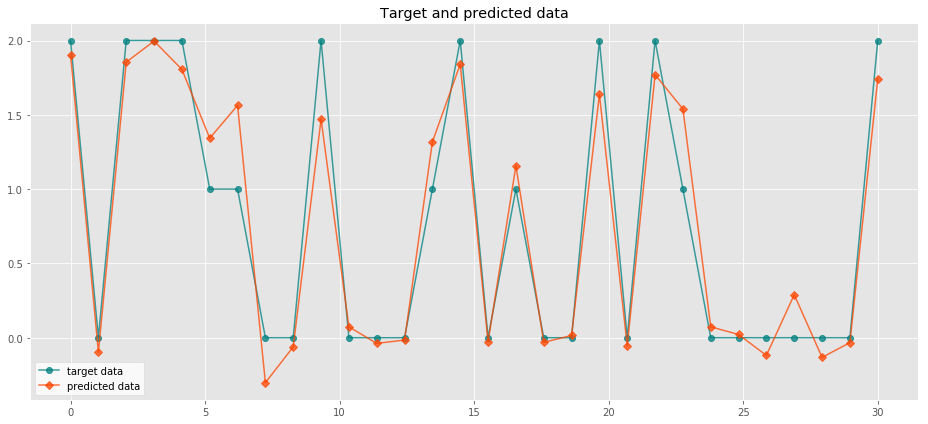

In [23]:
fig = plt.figure(figsize=(13, 6))

x = np.linspace(0, y_test.shape[0], y_test.shape[0])

plt.title('Target and predicted data')

plt.plot(x, y_test, '-o', color='teal', label='target data', alpha=0.75)
plt.plot(x, y_pred, '-D', color='orangered',
         label='predicted data', alpha=0.75)

plt.legend(facecolor='white')
plt.tight_layout()
plt.show()

### Cross-validation

As we see, our model predicts the target values fairly well, but *could it be better*? Maybe, by selecting another number of PLSR components for our model.

The suggested way to determine the optimal number of PLSR components to keep doing this is using the *cross-validation* method. Cross-validation splits the data to multiple training and test sets and then provides an estimate (score) on how well our model is performing on every splitted set. The highest the score, the better our model performs. We will use the **sklearn.model_selection.cross_val_score()** function to cross-validate the training data.

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# initialize cross-validation score list
cv_scores = []

print('Cross-validation scores:')

for i in range(x_train.shape[1]):
    # create plsr object
    plsi = PLSRegression(n_components=i + 1, max_iter=500, scale=False)
    # fit plsr object
    plsi.fit(x_train, y_train)
    # calculate cross-validation scores
    score = cross_val_score(plsi, x_train, y_train, cv=5)
    # append scores to cross-validation score list
    cv_scores.append(score)
    # print cross-validation scores for each number of plsr components
    print('Components: {:2d}: {}'.format(i + 1, cv_scores[i]))

Cross-validation scores:
Components:  1: [ 0.92607915  0.80969928  0.83902629  0.92610579  0.88213008]
Components:  2: [ 0.93944677  0.88475383  0.85847678  0.93155921  0.91635111]
Components:  3: [ 0.94750768  0.88275306  0.89508841  0.95115666  0.91857926]
Components:  4: [ 0.94821772  0.88430437  0.89576383  0.93589557  0.91970402]


**cross_val_score()** calculates the cross-validation score for each splitted train/test set. The number of train/test sets is defined by the `cv` parameter. It is obvious that the more components we take into account, the higher the score (with minor fluctuations - not really obvious in this dataset).

A more meaningful way to display cross-validation scores is by displaying the mean cross validation score +/- the standard deviation for each number of components, instead of dipslaying the cross-validation score for for every train/test set. This can be done by using the numpy's **mean()** and **std()** attributes.

In [26]:
cv_scores_mean = []
cv_scores_std = []

print('Cross-validation scores:')

for i in range(len(cv_scores)):
    cv_scores_mean.append(cv_scores[i].mean())
    cv_scores_std.append(cv_scores[i].std())
    print('Components: {:2d}: {:.2f} (+/- {:.2f})'
          .format(i + 1, cv_scores_mean[i], cv_scores_std[i]))

Cross-validation scores:
Components:  1: 0.88 (+/- 0.05)
Components:  2: 0.91 (+/- 0.03)
Components:  3: 0.92 (+/- 0.03)
Components:  4: 0.92 (+/- 0.02)


It is useful to plot these cross-validation scores as a function of the number of components used for the PLSR.

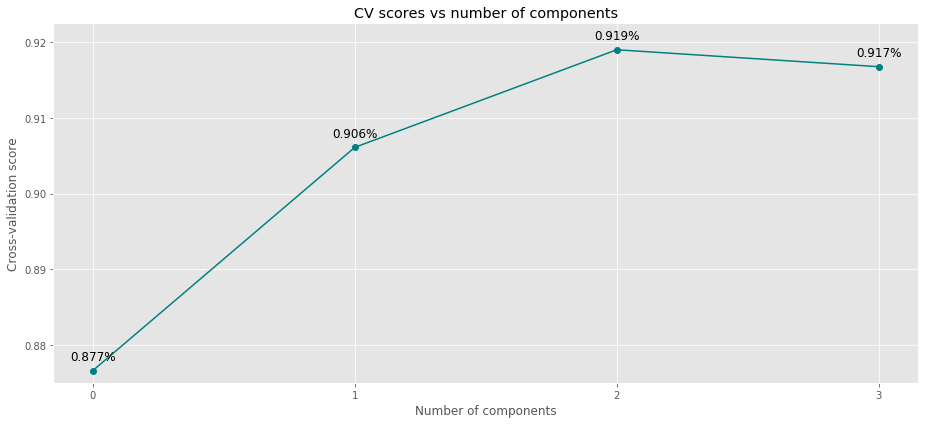

In [27]:
fig, ax = plt.subplots(figsize=(13, 6))

x = [i for i in range(len(cv_scores_mean))]

plt.title('CV scores vs number of components')
plt.plot(x, cv_scores_mean, '-o', color='teal')

### text over line-points  ###
yticks = ax.get_yticks()  # get y-axis ticks positions
offset = (yticks[-1] - yticks[-2]) * 0.1  # calculate y-axis offset

for i in range(0, len(cv_scores_mean)):
    ax.text(x[i], cv_scores_mean[i] + offset,  # x-y coordinates
            '{:.3f}%'.format(cv_scores_mean[i]),  # text and formatting
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontsize=12)  # font size

plt.ylim(0.875, 0.9225)
plt.xticks(x)
plt.xlabel('Number of components')
plt.ylabel('Cross-validation score')

plt.tight_layout()
plt.show()

As shown in the above plot, there is a small maximum at 3 components. However, it is clear that the difference between using 2 components and more than 2 is so small that our model should provide satisfactory results even with only 2 components.

In [28]:
pls = PLSRegression(n_components=2, max_iter=500, scale=False)
pls.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

### PLSR scores

The PLSR scores describe the position of each sample in each determined latent vector (LV). We can have a look at the PLSR scores usind the **x\_scores\_** and **y\_scores\_** attributes.

In [50]:
pls.x_scores_[0:5, :]  # print first 5 x_scores

array([[ 0.12472832, -0.71643029],
       [-2.51844085, -0.21580122],
       [ 1.84177389,  0.14275068],
       [-2.2301735 ,  0.05011562],
       [-0.52243206, -0.7188879 ]])

In [49]:
pls.y_scores_[0:5, :]  # print first 5 y_scores

array([[-0.12959527,  0.38668628],
       [-2.3512284 , -0.25423817],
       [ 2.09203787, -0.38051385],
       [-2.3512284 ,  0.18405792],
       [-0.12959527, -0.59728869]])

The PLSR x_scores are usually used in Partial Least Squares Discriminant Analysis (PLS-DA),

In [29]:
colors = {0: 'teal',
          1: 'orangered',
          2: 'olive'}

In [30]:
from matplotlib.patches import Ellipse

In [31]:
def ellipse(x, y, color):
    cov_mat = np.cov(x, y)
    evals, evecs = np.linalg.eig(cov_mat)
    print('Evals: ', evals / sum(evals))
    print('Evecs: ', evecs)

    ax = plt.gca()

    ax.add_patch(Ellipse((np.mean(x), np.mean(y)),
                         2 * np.sqrt(5.991 * evals[0]), 2 *
                         np.sqrt(5.991 * evals[1]),
                         alpha=0.5,
                         fill=False,
                         edgecolor=color,
                         linewidth=1.5,
                         linestyle='--',
                         angle=-np.degrees(np.arctan(evecs[0][1] / evecs[0][0]))))

Evals:  [ 0.21391283  0.78608717]
Evecs:  [[-0.9702774 -0.2419954]
 [ 0.2419954 -0.9702774]]
Evals:  [ 0.90115496  0.09884504]
Evecs:  [[ 0.72054394 -0.69340928]
 [ 0.69340928  0.72054394]]
Evals:  [ 0.87154396  0.12845604]
Evecs:  [[ 0.70759808 -0.70661514]
 [ 0.70661514  0.70759808]]


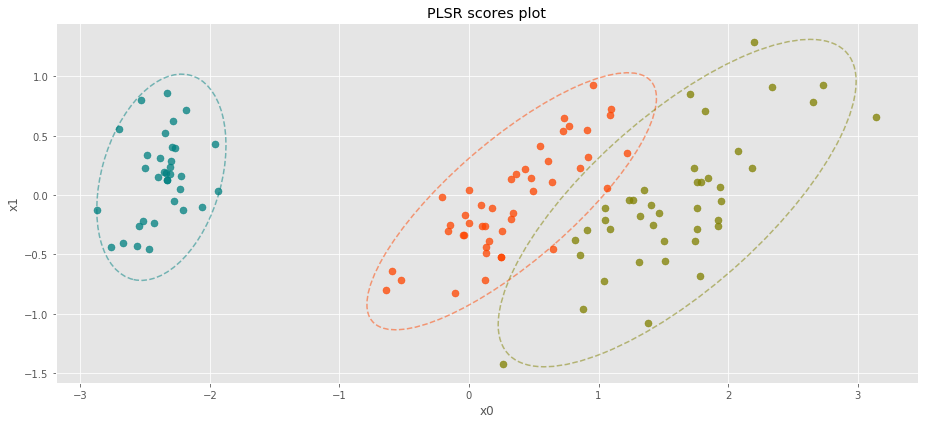

In [32]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR scores plot')

for key in colors:
    plt.scatter(pls.x_scores_[y_train.target == key, 0], pls.x_scores_[
                y_train.target == key, 1], color=colors[key], s=50, alpha=0.75)
    ellipse(pls.x_scores_[y_train.target == key, 0], pls.x_scores_[
            y_train.target == key, 1], color=colors[key])

plt.xlabel('x0')
plt.ylabel('x1')

plt.tight_layout()
plt.show()

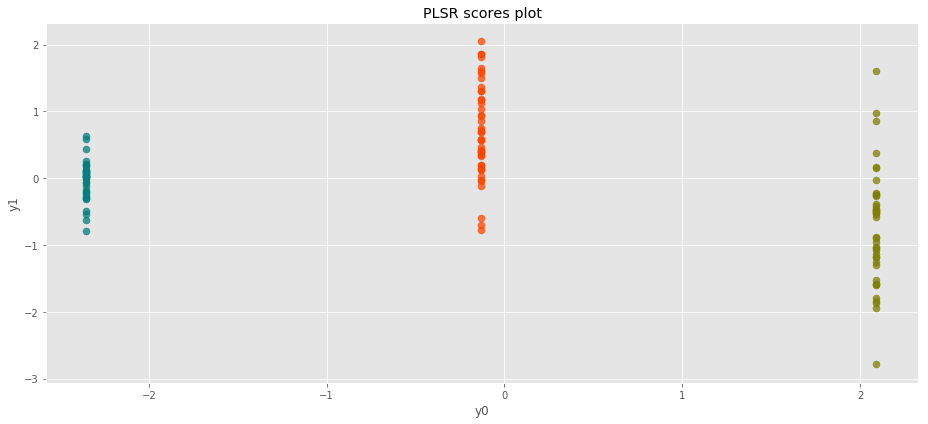

In [33]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR scores plot')

for key in colors:
    plt.scatter(pls.y_scores_[y_train.target == key, 0], pls.y_scores_[
                y_train.target == key, 1], color=colors[key], s=50, alpha=0.75)

plt.xlabel('y0')
plt.ylabel('y1')

plt.tight_layout()
plt.show()

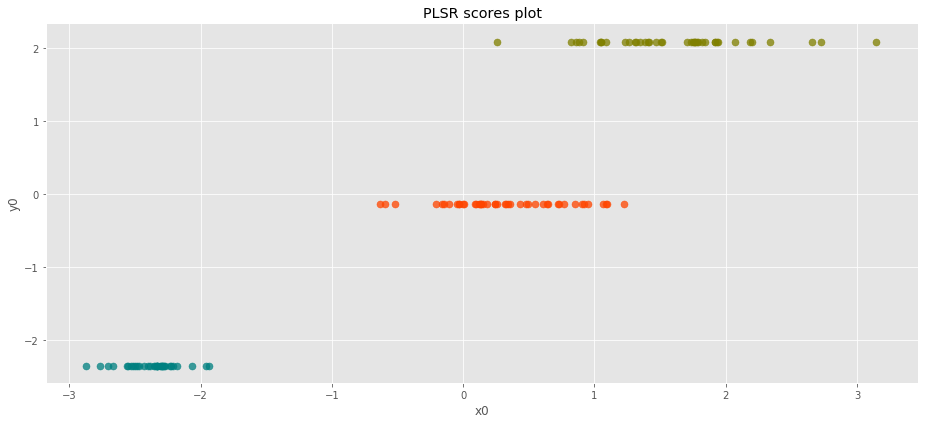

In [34]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR scores plot')

for key in colors:
    plt.scatter(pls.x_scores_[y_train.target == key, 0], pls.y_scores_[
                y_train.target == key, 0], color=colors[key], s=50, alpha=0.75)

plt.xlabel('x0')
plt.ylabel('y0')

plt.tight_layout()
plt.show()

Evals:  [ 0.66861381  0.33138619]
Evecs:  [[ 0.83795015 -0.54574677]
 [ 0.54574677  0.83795015]]
Evals:  [ 0.0796447  0.9203553]
Evecs:  [[-0.86649842 -0.49917981]
 [ 0.49917981 -0.86649842]]
Evals:  [ 0.10542846  0.89457154]
Evecs:  [[-0.86689997 -0.49848214]
 [ 0.49848214 -0.86689997]]


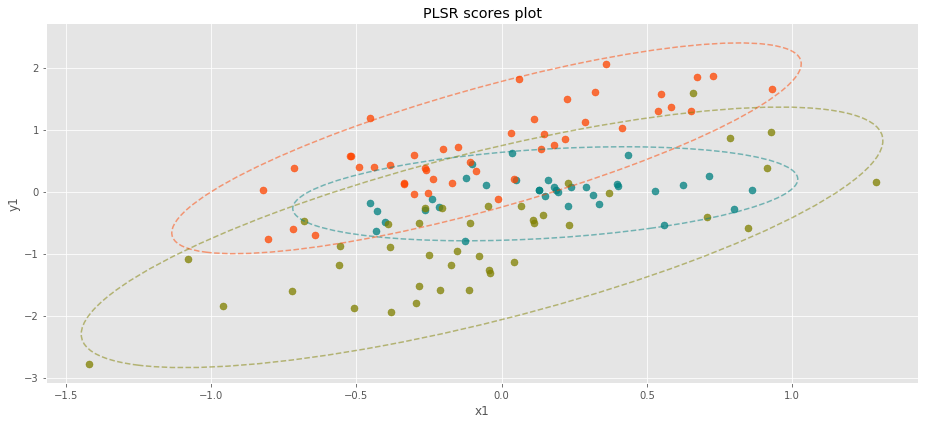

In [35]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR scores plot')

for key in colors:
    plt.scatter(pls.x_scores_[y_train.target == key, 1], pls.y_scores_[
                y_train.target == key, 1], color=colors[key], s=50, alpha=0.75)
    ellipse(pls.x_scores_[y_train.target == key, 1], pls.y_scores_[
            y_train.target == key, 1], color=colors[key])

plt.xlabel('x1')
plt.ylabel('y1')

plt.tight_layout()
plt.show()

### PLSR loadings

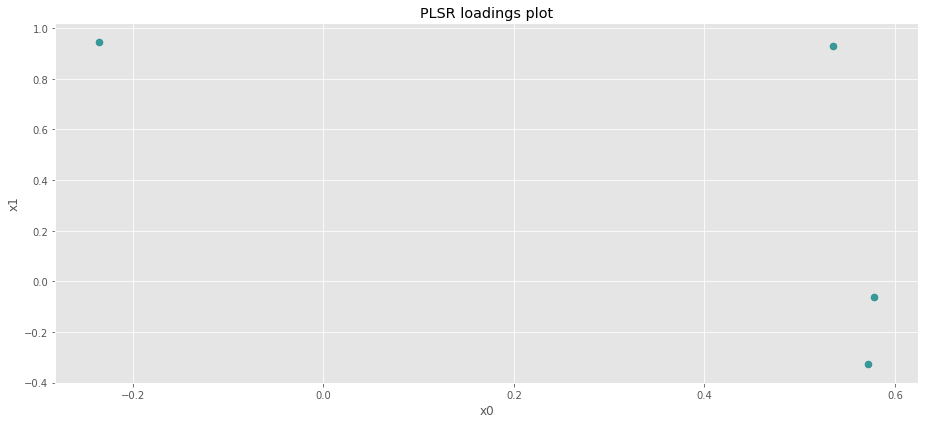

In [36]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR loadings plot')

plt.scatter(pls.x_loadings_[:, 0], pls.x_loadings_[
            :, 1], color='teal', s=50, alpha=0.75)

plt.xlabel('x0')
plt.ylabel('x1')

plt.tight_layout()
plt.show()

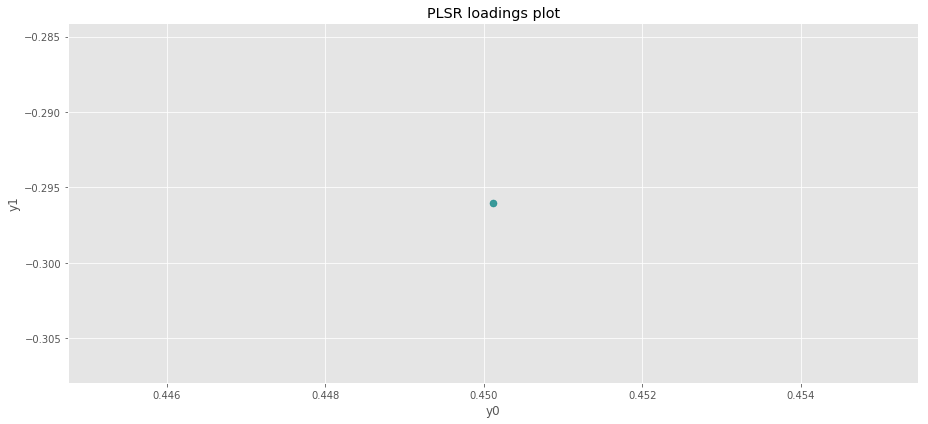

In [37]:
fig = plt.figure(figsize=(13, 6))

plt.title('PLSR loadings plot')

plt.scatter(pls.y_loadings_[:, 0], pls.y_loadings_[
            :, 1], color='teal', s=50, alpha=0.75)

plt.xlabel('y0')
plt.ylabel('y1')

plt.tight_layout()
plt.show()

In [38]:
y = pls.y_scores_.dot(pls.y_loadings_.T)
y

array([[-0.17280929],
       [-0.98306778],
       [ 1.05431532],
       [-1.11282248],
       [ 0.1184901 ],
       [ 1.01844541],
       [ 1.06366953],
       [-0.19731872],
       [-0.52595577],
       [-0.99844578],
       [ 0.68776467],
       [-1.05563413],
       [-0.44549528],
       [-1.08849119],
       [ 1.09663942],
       [-0.87178144],
       [-1.06671445],
       [-0.26169518],
       [-0.33960111],
       [ 1.27643449],
       [-1.08442877],
       [-0.11801775],
       [ 0.46901917],
       [ 1.20073765],
       [-0.31063626],
       [-0.16184205],
       [-1.18799597],
       [-0.04521614],
       [ 1.39386703],
       [-0.17693676],
       [-0.96913259],
       [-0.09536933],
       [-1.08239756],
       [-0.36416311],
       [ 1.08955648],
       [-0.66667772],
       [ 1.31474875],
       [-0.26999023],
       [-1.0675381 ],
       [ 1.76628827],
       [ 1.01124483],
       [-1.23374632],
       [-0.10100946],
       [ 1.08056787],
       [-0.99119262],
       [ 1

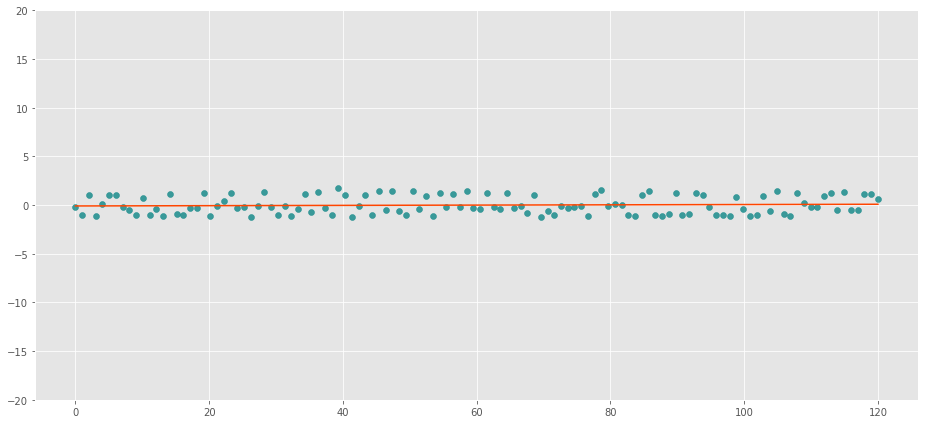

In [39]:
plt.figure(figsize=(13, 6))

x = np.linspace(0, len(y), len(y))
fit = np.polyfit(x, y, 1)

plt.scatter(x, y, color='teal', alpha=0.75)
plt.plot(x, fit[1] + fit[0] * x, color='orangered')

plt.ylim(-20, 20)

plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
aaa = [np.int(i) for i in pls.predict(x_train)]

In [42]:
confusion_matrix(y_train.values, aaa)

array([[34,  0,  0],
       [ 2, 43,  0],
       [ 0, 35,  6]])

In [43]:
pls.predict(x_train)

array([[ 1.32657048],
       [-0.01137901],
       [ 1.84509094],
       [ 0.03965275],
       [ 1.03599865],
       [ 2.00108966],
       [ 1.66837903],
       [ 1.17155206],
       [ 1.30511217],
       [-0.15933755],
       [ 2.0211296 ],
       [-0.0598424 ],
       [ 1.19441043],
       [-0.15473583],
       [ 1.96063955],
       [-0.05809903],
       [-0.24714087],
       [ 1.26274886],
       [ 1.27146708],
       [ 1.65261076],
       [-0.09291243],
       [ 1.12927367],
       [ 2.27755636],
       [ 1.90562118],
       [ 1.18736038],
       [ 1.18047536],
       [ 0.15976794],
       [ 1.07657373],
       [ 1.63203078],
       [ 1.24873369],
       [-0.01121399],
       [ 1.13620366],
       [-0.06200073],
       [ 1.18304373],
       [ 1.81915107],
       [ 1.50223904],
       [ 1.63974091],
       [ 1.2562788 ],
       [-0.02909573],
       [ 1.5964725 ],
       [ 1.91018285],
       [ 0.04686781],
       [ 1.1425087 ],
       [ 2.06275295],
       [-0.1350258 ],
       [ 1

In [44]:
y_train.values

array([[1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
    